In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import helper as hlp
import gen_data

In [21]:
load_path = 'C:/Users/Shira/Documents/PhD/deepLearning/sim/sss/res/'
#load_path = 'C:/Users/shirak/Documents/PhD/deepLearning/sim/sss/res/'
pars = [1, 2, 10, 20, 50, 100]
par = 'd_3_k_300'
config = 'two_dim_' + str(par)
fontsize = 15
matplotlib.rcParams.update({'font.size': fontsize})

['test_acc', 'nzs_per_epoch', 'config', 'y_train', 'avg_costs', 'issep_sbs', 'train_acc', 'train_acc_nonsep_sbs', 'delta_sbs', 'w_learned_sbs', 'x_train', 'test_acc_sbs', 'train_acc_sep_sbs', 'iszero_sbs']
Dataset Parameters:
     p = 2 (input dimension)
     n = 1000 (number of training examples)
     gamma = 1 (1 / |w*|
     pi_nonsep = 0.5 (fraction of non-separable examples)
Network Parameters:
     k = 300  (hidden layer width is 2k)
     alpha = 0.1 (leaky relu parameter)
Optimization Parameters:
     eta = 0.01 (learning rate)

Components of bound for the number of non-zero steps M:
     |w*|^2 / alpha^2 = 100.000
     |w*|^2 / min(eta, sqrt(eta)) = 100.000
Value for R, bound on initial weights norm:
     1/sqrt(2k) = 0.041
To guarantee expressiveness, k should be at least:
     2*(n/(2d-2)) = 1000
     k =  300
{'dim': 2, 'k': 300, 'pi_nonsep': 0.5, 'res_path': 'C:/Users/Shira/Documents/PhD/deepLearning/sim/sss/res/', 'n_test': 100, 'name': 'two_dim_d_3_k_300', 'learning_rate':

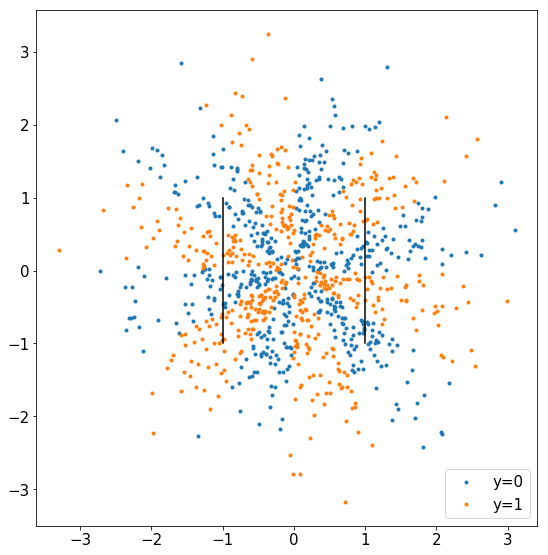

In [23]:
data = np.load(load_path + config + '_data' + '.npy').reshape(1)[0]

all = np.load(load_path + config + '_res' + '.npz')
print(all.files)

cfg = all['config'].reshape(-1)[0]
hlp.print_params(cfg)
k = cfg['k']
eta = cfg['learning_rate']
alpha = cfg['alpha']
gamma = cfg['gamma']
pi = cfg['pi_nonsep']

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
w_star_hat = data['w_star_hat']
n_train = x_train.shape[0]
dim = x_train.shape[1]
w_star_norm = 1 / gamma

train = all['train_acc']
test = all['test_acc']
nzs_per_epoch = all['nzs_per_epoch']
iszero_sbs = all['iszero_sbs']
issep_sbs = all['issep_sbs']
delta_sbs = all['delta_sbs']
w_learned_sbs = all['w_learned_sbs']

w_star = w_star_norm * w_star_hat
vi = 1 / np.sqrt(2*k)
w_max = 1 / np.sqrt(2*k)

print(cfg)
hlp.plot_data(x_train, y_train, w_star_hat, gamma)


In [24]:
n_test_plus = 10000
w = data['w']

x_test_plus = rn.normal(0, 1, [n_test_plus, dim])
y_test_plus = hlp.compute_f(w, x_test_plus, alpha)

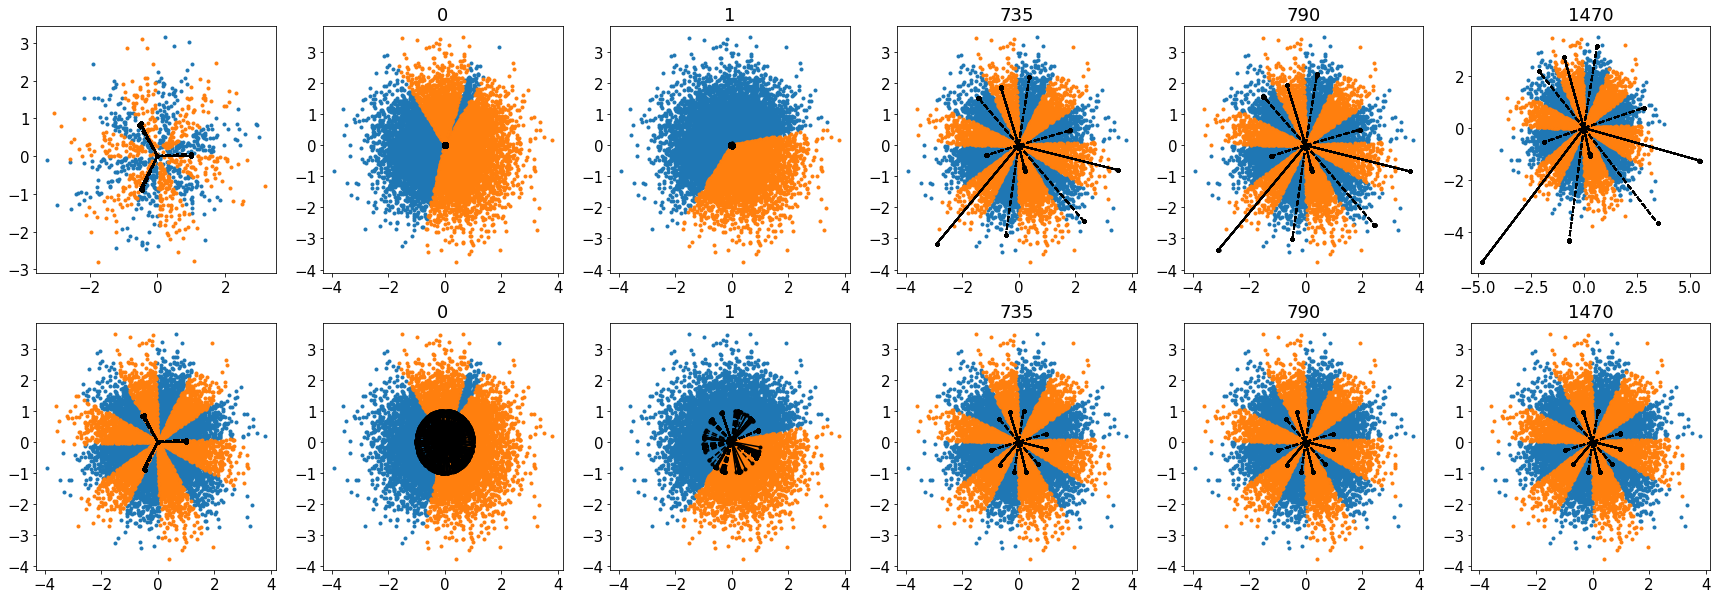

In [25]:
all = np.load(load_path + config + '_res' + '.npz')
w_learned_sbs = all['w_learned_sbs']
test_acc_sbs = all['test_acc_sbs']

max_ind = len(w_learned_sbs)-1
best_ind = np.argmax(test_acc_sbs)
T = [0, 1, int(max_ind/2), best_ind, max_ind]

plot_x, plot_y = 5,5
n0, n1 = 2, len(T) + 1
fig, axes = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)

ax = axes[0, 0]
ax.plot(x_train[:, 0][np.argwhere(y_train==0)], x_train[:, 1][np.argwhere(y_train==0)], '.')
ax.plot(x_train[:, 0][np.argwhere(y_train==1)], x_train[:, 1][np.argwhere(y_train==1)], '.')
for i in range(k):
    ax.plot([0,w[i, 0]], [0,w[i, 1]], 'k.-')
    ax.plot([0,w[i+k, 0]], [0,w[i+k, 1]], 'k.--')

ax = axes[1, 0]
ax.plot(x_test_plus[:, 0][np.argwhere(y_test_plus==0)], x_test_plus[:, 1][np.argwhere(y_test_plus==0)], '.')
ax.plot(x_test_plus[:, 0][np.argwhere(y_test_plus==1)], x_test_plus[:, 1][np.argwhere(y_test_plus==1)], '.')
for i in range(k):
    ax.plot([0,w[i, 0]], [0,w[i, 1]], 'k.-')
    ax.plot([0,w[i+k, 0]], [0,w[i+k, 1]], 'k.--')

ax_num = 0
for t in T:
    ax_num += 1
    w_t = w_learned_sbs[t].copy()
    y_test_plus_hat = hlp.compute_f(w_t, x_test_plus, alpha)

    ax = axes[0, ax_num]
    ax.plot(x_test_plus[:, 0][np.argwhere(y_test_plus_hat==0)], x_test_plus[:, 1][np.argwhere(y_test_plus_hat==0)], '.')
    ax.plot(x_test_plus[:, 0][np.argwhere(y_test_plus_hat==1)], x_test_plus[:, 1][np.argwhere(y_test_plus_hat==1)], '.')
    for i in range(k):
        ax.plot([0,w_t[i, 0]], [0,w_t[i, 1]], 'k.-')
        ax.plot([0,w_t[i+k, 0]], [0,w_t[i+k, 1]], 'k.--')    
    ax.set_title(t)
    
    ax = axes[1, ax_num]
    ax.plot(x_test_plus[:, 0][np.argwhere(y_test_plus_hat==0)], x_test_plus[:, 1][np.argwhere(y_test_plus_hat==0)], '.')
    ax.plot(x_test_plus[:, 0][np.argwhere(y_test_plus_hat==1)], x_test_plus[:, 1][np.argwhere(y_test_plus_hat==1)], '.')
    for i in range(k):
        w_t[i, :] = w_t[i, :] / np.sqrt(np.sum(w_t[i, :]**2))
        w_t[i+k, :] = w_t[i+k, :] / np.sqrt(np.sum(w_t[i+k, :]**2))
        ax.plot([0,w_t[i, 0]], [0,w_t[i, 1]], 'k.-')
        ax.plot([0,w_t[i+k, 0]], [0,w_t[i+k, 1]], 'k.--')    
    ax.set_title(t)

790


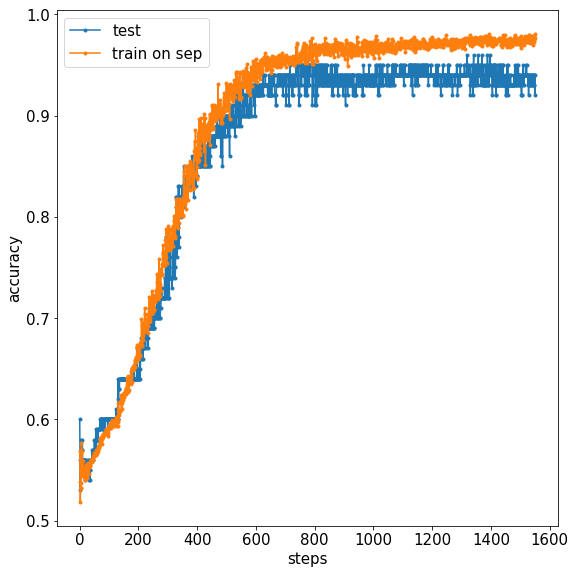

In [26]:
all = np.load(load_path + config + '_res' + '.npz')
train_acc_sep_sbs = all['train_acc_sep_sbs']
train_acc_nonsep_sbs = all['train_acc_nonsep_sbs']
test_acc_sbs = all['test_acc_sbs']
min_ind = 0
max_ind = len(train_acc_sep_sbs)
print(np.argmax(test_acc_sbs))

plot_x, plot_y = 8, 8
n0, n1 = 1, 1

fig, axes = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
fig.tight_layout(h_pad = 5)
    
ax = axes
ax.set_xlabel('steps')
ax.set_ylabel('accuracy')
ax.plot(test_acc_sbs[min_ind:max_ind], '.-', label = 'test')
ax.plot(train_acc_sep_sbs[min_ind:max_ind], '.-', label = 'train on sep')
#ax.plot(train_acc_nonsep_sbs[min_ind:max_ind], '.-', label = 'train on nonsep')
ax.legend()